In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sangeetha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [2]:
data=pd.read_csv("mergedata.csv")

In [3]:
data

,Unnamed: 0,web-scraper-order,web-scraper-start-url,Books,Books-href,Author,Abstract,category,views
0,0,1637239114-889,"https://www.bookrix.com/books;true-crime,id:51...",The Poisoned Pen,https://www.bookrix.com/_ebook-arthur-b-reeve-...,Arthur B. Reeve,"Kennedy's Suit-Case Was Lying Open On The Bed,...",True Crime,3
1,1,1637239105-888,"https://www.bookrix.com/books;true-crime,id:51...",The History Of A Crime (fiscle part- 4) The Te...,https://www.bookrix.com/_ebook-victor-hugo-the...,Victor Hugo,"On December 1, 1851, Charras[1] Shrugged his S...",True Crime,3
2,2,1637239435-913,"https://www.bookrix.com/books;true-crime,id:51...",Grimshaw Mysteries,https://www.bookrix.com/_ebook-kyler-james-gri...,Kyler James,Rick grimshaw is an old school detective in a ...,True Crime,646
3,3,1637239159-892,"https://www.bookrix.com/books;true-crime,id:51...",Maiwa's Revenge,https://www.bookrix.com/_ebook-h-rider-haggard...,H. Rider Haggard,"Sir Henry Rider Haggard, KBE (/ˈhæɡərd/; 22 Ju...",True Crime,5
4,4,1637239684-930,"https://www.bookrix.com/books;true-crime,id:51...",Little Too Obsessed,https://www.bookrix.com/_ebook-ashley-arble-li...,Ashley Arble,"Danika, a young teenager, can't wait to have k...",True Crime,3701
...,...,...,...,...,...,...,...,...,...
589,40,1637654131-1968,"https://www.bookrix.com/books;study-aids,id:47...",Alt Text Writing,https://www.bookrix.com/_ebook-kalai-selvi-ari...,Kalai Selvi Arivalagan,How to write better Alt Text - a branch in con...,Study Aids,874
590,41,1637654134-1969,"https://www.bookrix.com/books;study-aids,id:47...",REPORT ANALYSIS: MAGAZINES IN PAKISTAN,https://www.bookrix.com/_ebook-muhammad-sharje...,"Muhammad Sharjeel Ashraf, Sundus Haseeb, Wajee...",The book contains a report on survey conducted...,Study Aids,916
591,42,1637653725-1930,"https://www.bookrix.com/books;study-aids,id:47...",Advice to a Mother on the Management of her Ch...,https://www.bookrix.com/_ebook-pye-henry-chava...,Pye Henry Chavasse,"An infant's clothes, napkins especially, ought...",Study Aids,2
592,43,1637653766-1932,"https://www.bookrix.com/books;study-aids,id:47...",The Head Voice and Other Problems Practical Ta...,https://www.bookrix.com/_ebook-d-a-clippinger-...,D. A. Clippinger,The following chapters are the outgrowth of an...,Study Aids,2


In [4]:
data.shape

(594, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             594 non-null    int64 
 1   web-scraper-order      594 non-null    object
 2   web-scraper-start-url  594 non-null    object
 3   Books                  594 non-null    object
 4   Books-href             594 non-null    object
 5   Author                 594 non-null    object
 6   Abstract               594 non-null    object
 7   category               594 non-null    object
 8   views                  594 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 41.9+ KB


In [6]:
data.describe()

,Unnamed: 0,views
count,594.000000,594.000000
mean,29.587542,1323.358586
std,19.708155,7267.847305
min,0.000000,0.000000
25%,13.000000,2.000000
50%,27.000000,3.000000
75%,45.000000,705.500000
max,83.000000,147010.000000


In [7]:
#Removing unwanted columns
data.drop(['Unnamed: 0','web-scraper-order','web-scraper-start-url','Books-href','views'],axis=1,inplace=True)

In [8]:
data

,Books,Author,Abstract,category
0,The Poisoned Pen,Arthur B. Reeve,"Kennedy's Suit-Case Was Lying Open On The Bed,...",True Crime
1,The History Of A Crime (fiscle part- 4) The Te...,Victor Hugo,"On December 1, 1851, Charras[1] Shrugged his S...",True Crime
2,Grimshaw Mysteries,Kyler James,Rick grimshaw is an old school detective in a ...,True Crime
3,Maiwa's Revenge,H. Rider Haggard,"Sir Henry Rider Haggard, KBE (/ˈhæɡərd/; 22 Ju...",True Crime
4,Little Too Obsessed,Ashley Arble,"Danika, a young teenager, can't wait to have k...",True Crime
...,...,...,...,...
589,Alt Text Writing,Kalai Selvi Arivalagan,How to write better Alt Text - a branch in con...,Study Aids
590,REPORT ANALYSIS: MAGAZINES IN PAKISTAN,"Muhammad Sharjeel Ashraf, Sundus Haseeb, Wajee...",The book contains a report on survey conducted...,Study Aids
591,Advice to a Mother on the Management of her Ch...,Pye Henry Chavasse,"An infant's clothes, napkins especially, ought...",Study Aids
592,The Head Voice and Other Problems Practical Ta...,D. A. Clippinger,The following chapters are the outgrowth of an...,Study Aids


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['category']=encoder.fit_transform(data['category'])
data.head()

,Books,Author,Abstract,category
0,The Poisoned Pen,Arthur B. Reeve,"Kennedy's Suit-Case Was Lying Open On The Bed,...",10
1,The History Of A Crime (fiscle part- 4) The Te...,Victor Hugo,"On December 1, 1851, Charras[1] Shrugged his S...",10
2,Grimshaw Mysteries,Kyler James,Rick grimshaw is an old school detective in a ...,10
3,Maiwa's Revenge,H. Rider Haggard,"Sir Henry Rider Haggard, KBE (/ˈhæɡərd/; 22 Ju...",10
4,Little Too Obsessed,Ashley Arble,"Danika, a young teenager, can't wait to have k...",10


In [10]:
data.isnull().sum()

Books       0
Author      0
Abstract    0
category    0
dtype: int64

In [11]:
data['category'].value_counts()

category
1     84
10    71
6     63
0     63
2     63
3     61
8     60
7     45
5     33
4     27
9     24
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

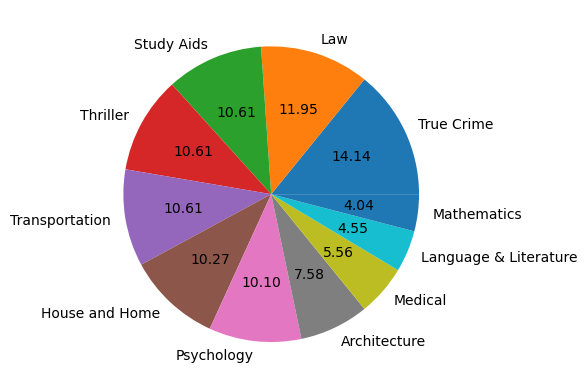

In [12]:
import matplotlib.pyplot as plt
plt.pie(data['category'].value_counts(),labels=['True Crime ','Law','Study Aids','Thriller','Transportation','House and Home','Psychology','Architecture','Medical','Language & Literature','Mathematics'],autopct="%0.2f")
plt.show

In [13]:
#!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sangeetha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<Axes: xlabel='category', ylabel='Density'>

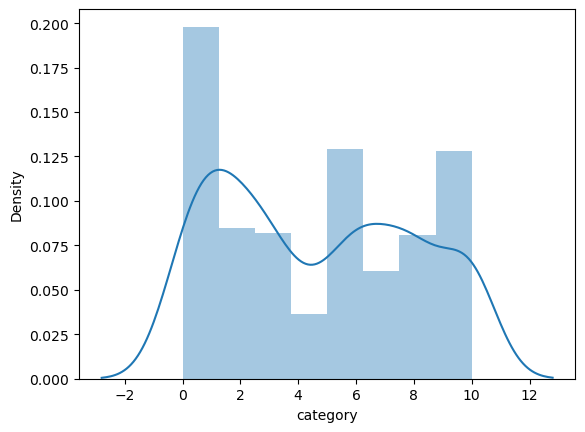

In [14]:
sns.distplot(data['category'])

<Axes: >

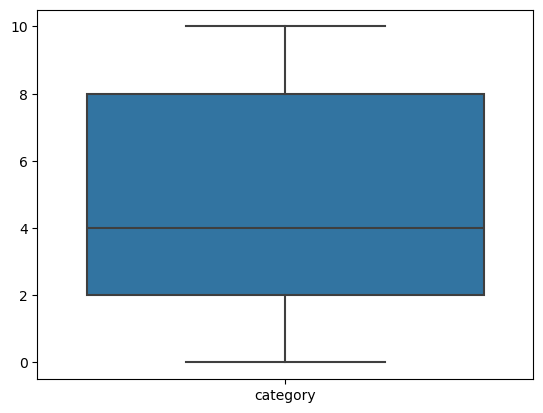

In [15]:
sns.boxplot(data=data)

In [16]:
from nltk.corpus import stopwords
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


def transform_text(text):
    text=text.lower()   #lower
    text=nltk.word_tokenize(text) #tokenize 
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
           
    text=y[:]  
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english')and i not in string.punctuation:   #Removing StopWords
            y.append(i)
         
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))   #Stemming
    
    return " ".join(y)

In [17]:
!pip install Lookup
data['transformed_text']=data['Abstract'].apply(transform_text)
data.head()

Defaulting to user installation because normal site-packages is not writeable


,Books,Author,Abstract,category,transformed_text
0,The Poisoned Pen,Arthur B. Reeve,"Kennedy's Suit-Case Was Lying Open On The Bed,...",10,kennedi lie open bed liter throw thing chiffon...
1,The History Of A Crime (fiscle part- 4) The Te...,Victor Hugo,"On December 1, 1851, Charras[1] Shrugged his S...",10,decemb 1 1851 charra 1 shrug shoulder unload p...
2,Grimshaw Mysteries,Kyler James,Rick grimshaw is an old school detective in a ...,10,rick grimshaw old school detect new world tech...
3,Maiwa's Revenge,H. Rider Haggard,"Sir Henry Rider Haggard, KBE (/ˈhæɡərd/; 22 Ju...",10,sir henri rider haggard kbe 22 june 1856 14 ma...
4,Little Too Obsessed,Ashley Arble,"Danika, a young teenager, can't wait to have k...",10,danika young teenag ca wait kid buy babi doll ...


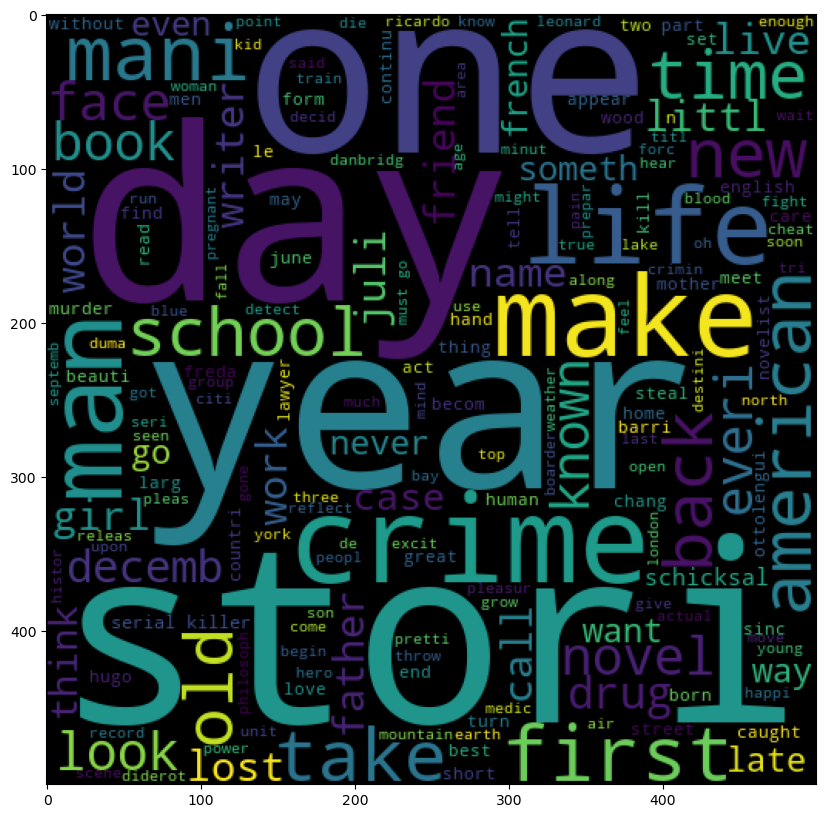

In [18]:

from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')
true_crime_wc=wc.generate(data[data['category']==10]['transformed_text'].str.cat(sep=""))
plt.figure(figsize=(20,10))
plt.imshow(true_crime_wc)